# Federated Client Predictions Analysis

This notebook analyzes the prediction performance of each federated client by comparing their local model's predicted temperatures against actual values.

The goal is to evaluate how well the decentralized training process performs across different clients, and identify any inconsistencies.

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all *_predictions.csv files from logs/
client_preds = {}
for fname in os.listdir("../logs"):
    if fname.endswith("_predictions.csv"):
        client_name = fname.replace("_predictions.csv", "")
        df = pd.read_csv(os.path.join("../logs", fname))
        client_preds[client_name] = df

## Visualizing Predicted vs Actual per Client

This section shows a side-by-side comparison of predicted and actual temperatures for each client.

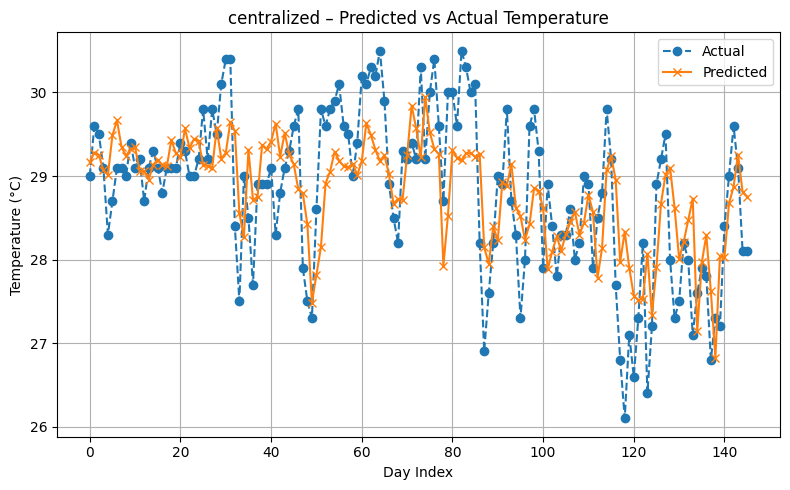

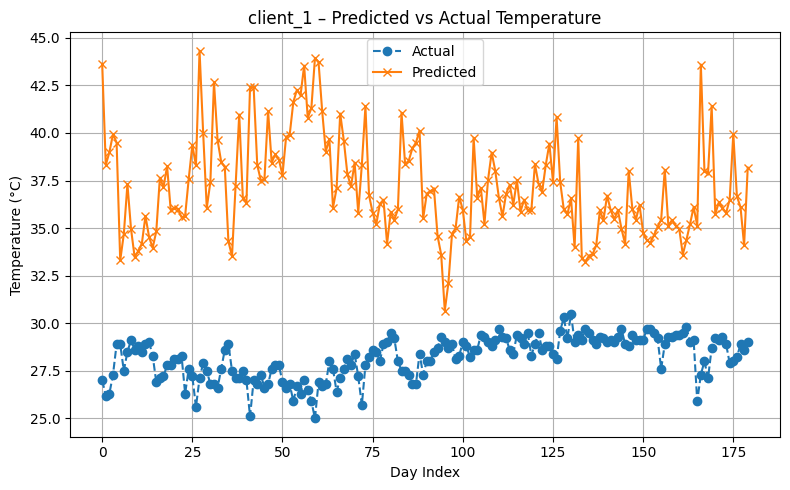

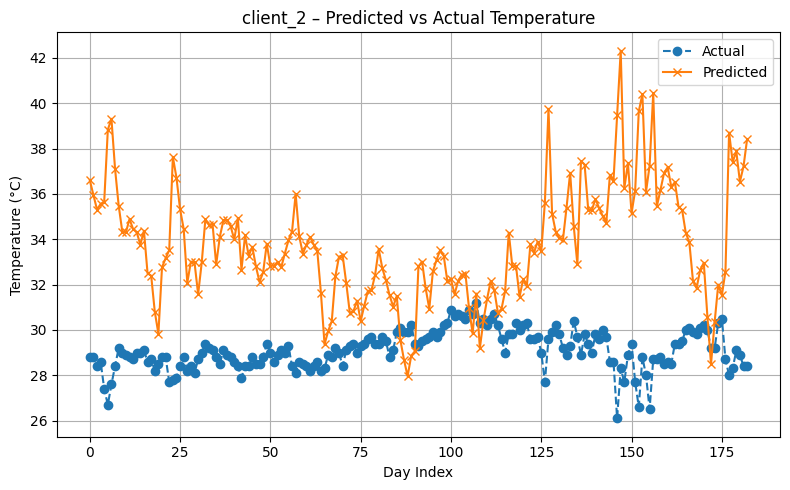

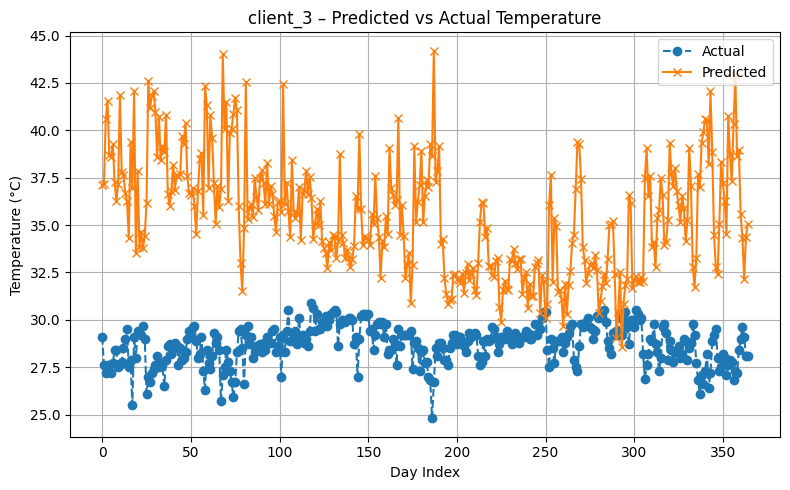

In [8]:
for client, df in client_preds.items():
    plt.figure(figsize=(8, 5))
    plt.plot(df["actual_temp"], label="Actual", linestyle='--', marker='o')
    plt.plot(df["predicted_temp"], label="Predicted", linestyle='-', marker='x')
    plt.title(f"{client} – Predicted vs Actual Temperature")
    plt.xlabel("Day Index")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 📏 Performance Metrics per Client

We calculate MAE and RMSE for each client to compare prediction accuracy across the decentralized nodes.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

results = []
for client, df in client_preds.items():
    mae = mean_absolute_error(df["actual_temp"], df["predicted_temp"])
    rmse = sqrt(mean_squared_error(df["actual_temp"], df["predicted_temp"]))
    results.append({
        "client": client,
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3)
    })

df_eval = pd.DataFrame(results).sort_values("client")
df_eval

,client,MAE,RMSE
0,centralized,0.594,0.724
1,client_1,8.961,9.566
2,client_2,4.729,5.558
3,client_3,6.785,7.716


## 📊 Visualizing MAE and RMSE per Client

This bar chart summarizes the error metrics across all federated clients and the centralized baseline.  
It provides a quick visual comparison of model accuracy across nodes.

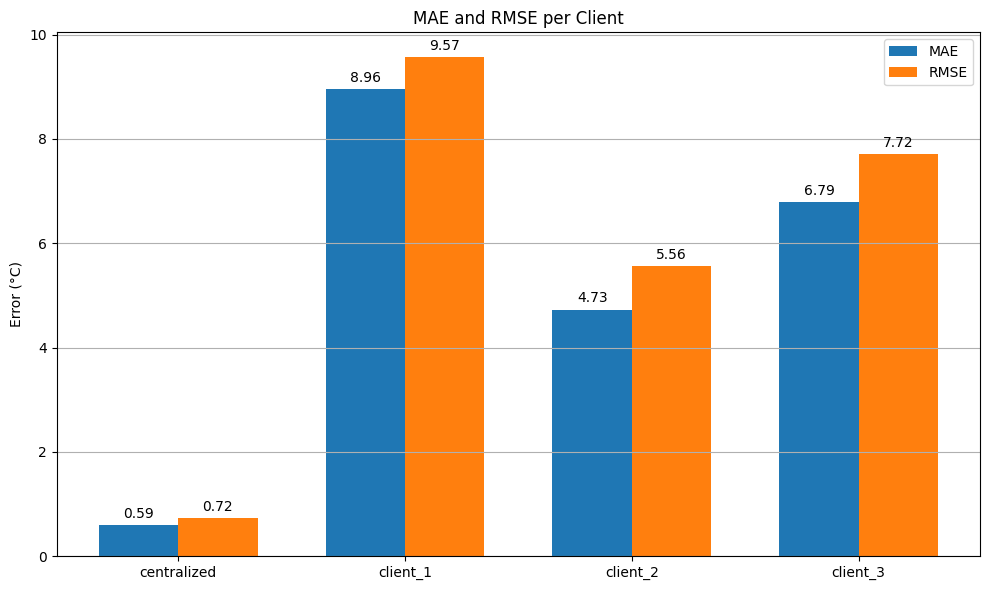

In [10]:
# Bar chart for MAE and RMSE
x = np.arange(len(df_eval["client"]))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, df_eval["MAE"], width, label='MAE')
bars2 = ax.bar(x + width/2, df_eval["RMSE"], width, label='RMSE')

# Add labels, title, legend
ax.set_ylabel("Error (°C)")
ax.set_title("MAE and RMSE per Client")
ax.set_xticks(x)
ax.set_xticklabels(df_eval["client"])
ax.legend()
ax.grid(axis="y")

# Annotate values on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Insight Summary

- The centralized model significantly outperforms all federated clients, with a **MAE of 0.59°C** and **RMSE of 0.72°C** — indicating strong generalization and stable performance.
- Federated clients show much higher error rates:
  - **Client 1** has the highest error (MAE: 8.96°C, RMSE: 9.57°C), which may suggest local data noise, imbalance, or overfitting during local training.
  - **Client 2** performs relatively better, though still far from centralized accuracy, possibly indicating more stable local data.
  - **Client 3** shows moderate performance, highlighting variation in how each client's model adapts to local data.
- These gaps suggest potential issues with data heterogeneity (Non-IID), limited local data size, or insufficient training rounds for full convergence.
- Future experiments should consider:
  - Simulating non-IID distributions explicitly.
  - Increasing communication rounds.
  - Trying personalized FL strategies (e.g., FedProx, FedAvgM).
  - Evaluating per-client data quality.